In [34]:
from math import isnan

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
global_substitutions = {
    'geograph3d': '3D Geo-graph', 
    'bfs': 'BFS', 
    'fail_1': 'Fail (1)', 
    'fail_2': 'Fail (2)', 
    'fail_3': 'Fail (3)', 
    'fail_4': 'Fail (4)', 
    'fail_5': 'Fail (5)', 
    'failure': 'Failure', 
    'success': 'Success', 
    'combined': 'Combined'
}

# Constants

In [3]:
ch_results_fname = 'data_grid.csv'
bch_results_fname = 'data_bcc.csv'
NUM_BOX_SIZES = 7
BOX_SIZES = [10, 15, 20, 25, 30, 35, 40]

NUM_ZONE_COUNTS = 3
ZONE_COUNTS = [2, 8, 25]

CUBE_SIZES = [box_size**3 for box_size in BOX_SIZES]
GEOGRAPH_STATUS_TO_INDEX = {'fail_1': 0, 'fail_2': 1, 'fail_3': 2, 'fail_4': 3, 'fail_5': 4, 'success': 5}
BFS_STATUS_TO_INDEX = {'failure': 0, 'success': 1}

# Plotting parameters
MARKER_SIZE = 8
LOG_X = False
LOG_Y = False
Y_MAX = 800
point_markers = ["s", "P", "^", "x", "+", "D", ">", "*", "v", "o"]
plt.rcParams['font.size'] = '18'

## Seaborn setup

In [12]:
sns.set_context("paper", font_scale=1.5, \
                rc={"font.family": "sans-serif", "font.sans-serif": \
                    ["Helvetica", "Arial", "DejaVu Sans", "sans-serif"]})
sns.set_palette(sns.xkcd_palette(colors=["navy", "grey"]))

# CH Results

## Load data

In [5]:
ch_df = pd.read_csv(ch_results_fname)
print(len(ch_df))
ch_df["number of cells"] = ch_df["number of cells"] / 1000.
ch_df["number of cells"] = ch_df["number of cells"].round(decimals=1)
unique_cell_counts_ch = np.unique(ch_df["number of cells"])
ch_df.head(30)

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.0,geograph3d,fail_1,114.4570,3951
1,8,1.0,geograph3d,fail_2,NaN,0
2,8,1.0,geograph3d,fail_3,153.3990,213
3,8,1.0,geograph3d,fail_4,155.9430,297
4,8,1.0,geograph3d,fail_5,160.4730,419
5,8,1.0,geograph3d,success,211.3520,5120
6,8,1.0,bfs,failure,11.6529,1550
7,8,1.0,bfs,success,6.7987,8450
8,8,3.4,geograph3d,fail_1,121.1170,13081
9,8,3.4,geograph3d,fail_2,NaN,0


In [6]:
df2 = ch_df.copy()
df2["flip result"] = df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
df2["total microseconds"] = df2["average microseconds"] * df2["number of samples"]
df2.head(12)

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.0,geograph3d,fail_1,114.4570,3951,failure,452219.607
1,8,1.0,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.0,geograph3d,fail_3,153.3990,213,failure,32673.987
3,8,1.0,geograph3d,fail_4,155.9430,297,failure,46315.071
4,8,1.0,geograph3d,fail_5,160.4730,419,failure,67238.187
5,8,1.0,geograph3d,success,211.3520,5120,success,1082122.240
6,8,1.0,bfs,failure,11.6529,1550,failure,18061.995
7,8,1.0,bfs,success,6.7987,8450,success,57449.015
8,8,3.4,geograph3d,fail_1,121.1170,13081,failure,1584331.477
9,8,3.4,geograph3d,fail_2,NaN,0,failure,NaN


In [7]:
df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)", \
                    "number of zones": "Number of Zones"}, \
           inplace=True)
df3 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df3["CPU Time (microseconds)"] = df3["total microseconds"] / df3["number of samples"]
df3.drop(columns=["total microseconds"], inplace=True)
df3.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.0                         bfs        failure 2                              18.069300   
                                               8                              11.652900   
                                               25                              6.130020   
                                       success 2                               7.210390   
                                               8                               6.798700   
                                               25                              5.067720   
                            geograph3d failure 2                             122.748206   
                                               8                             122.632552   
                                               25                            111.186813   
                                       success 2                             223.971000   
                                               8                             211.352000   
                                               25                            184.068000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.0                         bfs        failure 2                              822  
                                               8                             1550  
                                               25                            2115  
                                       success 2                             9178  
                                               8                             8450  
                                               25                            7885  
                            geograph3d failure 2                             4089  
                                               8                             4880  
                                               25                            5125  
                                       success 2                             5911  
                                               8                             5120  
                                               25                            4875

In [8]:
df4 = df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
df4["CPU Time (microseconds)"] = df4["total microseconds"] / df4["number of samples"]
df4["Status"] = "combined"
df4.drop(columns=["total microseconds"], inplace=True)
df4 = df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df4.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   
3.4                         bfs        combined 2                              24.686315   
                                                8                              17.328614   
                                                25                             14.621460   
                            geograph3d combined 2                             194.663981   
                                                8                             177.989988   
                                                25                            156.367163   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
3.4                         bfs        combined 2                            33750  
                                                8                            33750  
                                                25                           33750  
                            geograph3d combined 2                            33750  
                                                8                            33750  
                                                25                           33750

In [9]:
df5 = pd.concat([df3, df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
df5.head(12)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.0                         bfs        combined 2                               8.102992   
                                                8                               7.551101   
                                                25                              5.292396   
                                       failure  2                              18.069300   
                                                8                              11.652900   
                                                25                              6.130020   
                                       success  2                               7.210390   
                                                8                               6.798700   
                                                25                              5.067720   
                            geograph3d combined 2                             182.581000   
                                                8                             168.056909   
                                                25                            146.716392   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.0                         bfs        combined 2                            10000  
                                                8                            10000  
                                                25                           10000  
                                       failure  2                              822  
                                                8                             1550  
                                                25                            2115  
                                       success  2                             9178  
                                                8                             8450  
                                                25                            7885  
                            geograph3d combined 2                            10000  
                                                8                            10000  
                                                25                           10000

## Plot execution time vs. number of cells

In [145]:
"""
df: DataFrame with all experimental results for one honeycomb type
number_of_zones: value to filter on "Number of Zones" column
honeycomb_type: "ch" or "bch"
"""
def plot_time_vs_cellcount(df, number_of_zones, honeycomb_type, showtitle=False):
    dfk = df.reset_index()
    for old_str in global_substitutions:
        dfk = dfk.replace(old_str, global_substitutions[old_str])
    dfk = dfk[dfk["Number of Zones"] == number_of_zones]
    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["3D Geo-graph", "BFS"], style="Status", style_order=["Success", "Failure", "Combined"], kind="line", markers=True, markersize=MARKER_SIZE, data=dfk);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
        
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = unique_cell_counts_ch if honeycomb_type == "ch" else unique_cell_counts_bch
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[6]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])
        
    # Hack to make 'X' marker readable in legend
    legend = g._legend
    for legend_handle in legend.legendHandles:
        legend_handle._legmarker.set_markersize(8)
    
    line_failure = legend.get_lines()[-2]
    line_failure_marker = line_failure._legmarker
    line_failure_marker.set_ls(line_failure.get_ls())
    line_failure_marker.set_lw(0.2)
    line_failure_marker.set_ms(10)
        
    if showtitle:
        plt.title("{} Results, K={}".format(honeycomb_type.upper(), number_of_zones))
    plt.savefig("plot_{}_K{}.pdf".format(honeycomb_type, number_of_zones), bbox_inches="tight")
    plt.savefig("plot_{}_K{}.png".format(honeycomb_type, number_of_zones), bbox_inches="tight", dpi=600)

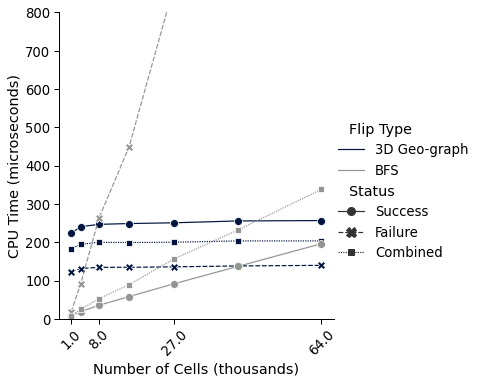

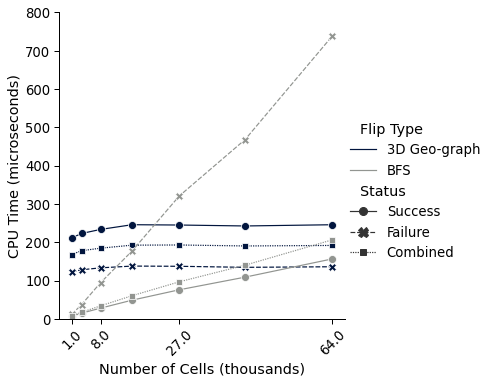

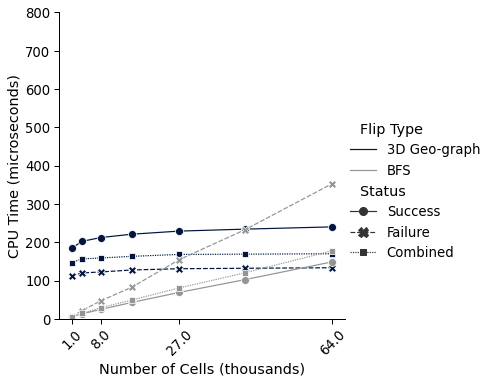

In [146]:
for k in ZONE_COUNTS:
    plot_time_vs_cellcount(df5, k, "ch")

# BCH Results

## Load data

In [147]:
bch_df = pd.read_csv(bch_results_fname)
print(len(bch_df))
bch_df["number of cells"] = bch_df["number of cells"] / 1000.
bch_df["number of cells"] = bch_df["number of cells"].round(decimals=1)
unique_cell_counts_bch = np.unique(bch_df["number of cells"])
bch_df.head()

168


,number of zones,number of cells,flip type,status,average microseconds,number of samples
0,8,1.7,geograph3d,fail_1,209.621,9954
1,8,1.7,geograph3d,fail_2,NaN,0
2,8,1.7,geograph3d,fail_3,292.862,4213
3,8,1.7,geograph3d,fail_4,271.728,169
4,8,1.7,geograph3d,fail_5,214.312,16


In [148]:
bch_df2 = bch_df.copy()
bch_df2["flip result"] = bch_df2.apply(\
    lambda row: "success" if row["status"] == "success" else "failure", axis=1)
bch_df2["total microseconds"] = bch_df2["average microseconds"] * bch_df2["number of samples"]
bch_df2.head()

,number of zones,number of cells,flip type,status,average microseconds,number of samples,flip result,total microseconds
0,8,1.7,geograph3d,fail_1,209.621,9954,failure,2086567.434
1,8,1.7,geograph3d,fail_2,NaN,0,failure,NaN
2,8,1.7,geograph3d,fail_3,292.862,4213,failure,1233827.606
3,8,1.7,geograph3d,fail_4,271.728,169,failure,45922.032
4,8,1.7,geograph3d,fail_5,214.312,16,failure,3428.992


In [149]:
bch_df2.rename(columns={"average microseconds": "CPU Time (microseconds)", \
                    "flip type": "Flip Type", \
                    "status": "status code", \
                    "flip result": "Status", \
                    "number of cells": "Number of Cells (thousands)",\
                    "number of zones": "Number of Zones"}, \
           inplace=True)
bch_df3 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df3["CPU Time (microseconds)"] = bch_df3["total microseconds"] / bch_df3["number of samples"]
bch_df3.drop(columns=["total microseconds"], inplace=True)
bch_df3.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status  Number of Zones                            
1.7                         bfs        failure 2                              84.282400   
                                               8                              37.385400   
                                               25                             21.469000   
                                       success 2                              15.299900   
                                               8                              12.286500   
...                                                                                 ...   
123.3                       geograph3d failure 8                             278.140039   
                                               25                            277.170305   
                                       success 2                             482.808000   
                                               8                             479.715000   
                                               25                            471.841000   

                                                                number of samples  
Number of Cells (thousands) Flip Type  Status  Number of Zones                     
1.7                         bfs        failure 2                              393  
                                               8                              659  
                                               25                            1727  
                                       success 2                            16897  
                                               8                            16631  
...                                                                           ...  
123.3                       geograph3d failure 8                          1180951  
                                               25                         1176575  
                                       success 2                            48738  
                                               8                            52239  
                                               25                           56615  

[84 rows x 2 columns]

In [150]:
bch_df4 = bch_df2.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones"]).sum()
bch_df4["CPU Time (microseconds)"] = bch_df4["total microseconds"] / bch_df4["number of samples"]
bch_df4["Status"] = "combined"
bch_df4.drop(columns=["total microseconds"], inplace=True)
bch_df4 = bch_df4.groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df4.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                            geograph3d combined 2                             304.843778   
                                                8                             258.474224   
                                                25                            261.168733   
6.1                         bfs        combined 2                              34.225410   
                                                8                              38.587116   
                                                25                             35.094105   
                            geograph3d combined 2                             264.405381   
                                                8                             265.332258   
                                                25                            275.240103   
14.9                        bfs        combined 2                              71.289820   
                                                8                              81.434485   
                                                25                             78.137964   
                            geograph3d combined 2                             273.231897   
                                                8                             272.828192   
                                                25                            270.387865   
29.4                        bfs        combined 2                             135.765118   
                                                8                             156.572658   
                                                25                            145.712602   
                            geograph3d combined 2                             277.006504   
                                                8                             291.247262   
                                                25                            275.802009   
51.4                        bfs        combined 2                             220.979028   
                                                8                             247.914901   
                                                25                            239.414301   
                            geograph3d combined 2                             282.182169   
                                                8                             278.945089   
                                                25                            279.455351   
82.2                        bfs        combined 2                             342.032913   
                                                8                             372.489183   
                                                25                            369.737404   
                            geograph3d combined 2                             285.291281   
                                                8                             279.947998   
                                                25                            283.244354   
123.3                       bfs        combined 2                             497.203463   
                                                8                             557.494502   
                                                25                            558.049508   
                            geograph3d combined 2                             289.710527   
                                                8                             286.678930   
                                                25                            286.107518   

                

In [151]:
bch_df5 = pd.concat([bch_df3, bch_df4]).groupby(["Number of Cells (thousands)", "Flip Type", "Status", "Number of Zones"]).sum()
bch_df5.head(100)

CPU Time (microseconds)  \
Number of Cells (thousands) Flip Type  Status   Number of Zones                            
1.7                         bfs        combined 2                              16.867865   
                                                8                              13.243132   
                                                25                             13.788943   
                                       failure  2                              84.282400   
                                                8                              37.385400   
...                                                                                  ...   
82.2                        bfs        failure  25                           2227.100000   
                                       success  2                             331.590000   
                                                8                             353.929000   
                                                25                            356.595000   
                            geograph3d combined 2                             285.291281   

                                                                 number of samples  
Number of Cells (thousands) Flip Type  Status   Number of Zones                     
1.7                         bfs        combined 2                            17290  
                                                8                            17290  
                                                25                           17290  
                                       failure  2                              393  
                                                8                              659  
...                                                                            ...  
82.2                        bfs        failure  25                            5774  
                                       success  2                           820054  
                                                8                           818963  
                                                25                          816016  
                            geograph3d combined 2                           821790  

[100 rows x 2 columns]

## Plot CPU Time vs. Number of Cells for BCH

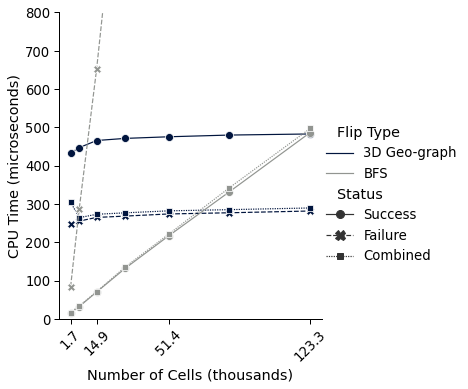

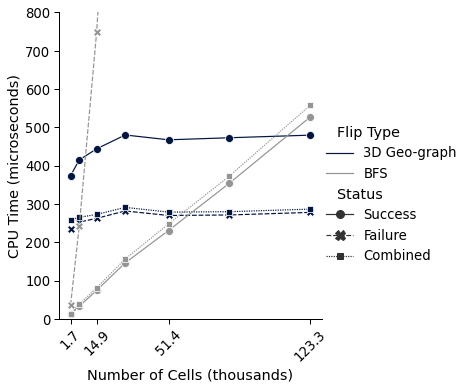

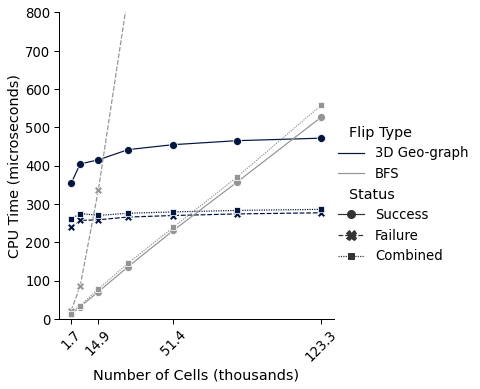

In [152]:
for k in ZONE_COUNTS:
    plot_time_vs_cellcount(bch_df5, k, "bch")

## Plot All "Combined" Results Together

In [153]:
df5["Honeycomb Type"] = "ch"
bch_df5["Honeycomb Type"] = "bch"

df = pd.concat([df5, bch_df5]).reset_index()
df = df[df["Status"] == "combined"].drop(columns=["Status", "number of samples"])
df = df.groupby(["Number of Cells (thousands)", "Flip Type", "Number of Zones", "Honeycomb Type"]).sum()
df.head(12)

CPU Time (microseconds)
Number of Cells (thousands) Flip Type  Number of Zones Honeycomb Type                         
1.0                         bfs        2               ch                             8.102992
                                       8               ch                             7.551101
                                       25              ch                             5.292396
                            geograph3d 2               ch                           182.581000
                                       8               ch                           168.056909
                                       25              ch                           146.716392
1.7                         bfs        2               bch                           16.867865
                                       8               bch                           13.243132
                                       25              bch                           13.788943
                            geograph3d 2               bch                          304.843778
                                       8               bch                          258.474224
                                       25              bch                          261.168733

In [154]:
def plot_combined_all_zone_counts(df, honeycomb_type, showtitle=False):
    dfh = df.reset_index()
    dfh = dfh[dfh["Honeycomb Type"] == honeycomb_type]
    for old_str in global_substitutions:
        dfh = dfh.replace(old_str, global_substitutions[old_str])

    g = sns.relplot(x="Number of Cells (thousands)", y="CPU Time (microseconds)", hue="Flip Type", hue_order=["3D Geo-graph", "BFS"], style="Number of Zones", style_order=[2, 8, 25], kind="line", markers=True, markersize=MARKER_SIZE, data=dfh);
    fig = plt.gcf()
    axes = np.array(g.axes.flat)
    for ax in axes:
        if LOG_X: ax.set(xscale="log")
        unique_cell_counts = np.unique(dfh["Number of Cells (thousands)"])
        ax.set_xticks([unique_cell_counts[0], unique_cell_counts[2], unique_cell_counts[4], unique_cell_counts[-1]])
        ax.set_xticklabels(ax.get_xticks(), rotation=45)

        if LOG_Y: ax.set(yscale="log")
        ax.set_ylim([0, Y_MAX])

    if showtitle:
        plt.title("Combined Results: {}, All Zone Counts".format(honeycomb_type.upper()))
    plt.savefig("plot_combined_{}.pdf".format(honeycomb_type), bbox_inches="tight")
    plt.savefig("plot_combined_{}.png".format(honeycomb_type), bbox_inches="tight", dpi=600)

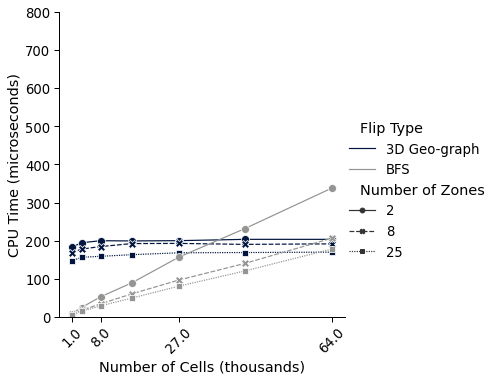

In [155]:
plot_combined_all_zone_counts(df, "ch")

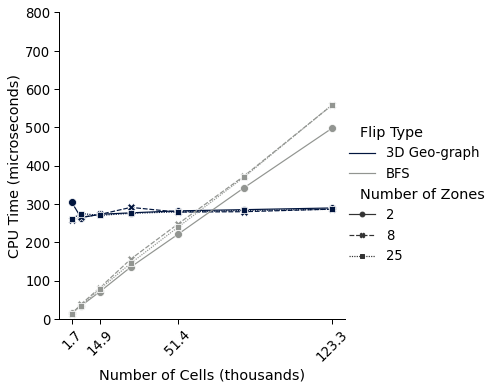

In [156]:
plot_combined_all_zone_counts(df, "bch")

# Generate Table(s) for Paper

## Reload Results DataFrames

In [157]:
colname_mapping = {
    'number of zones': 'K', 
    'number of cells': 'N', 
    'status': 'Status', 
    'average microseconds': 'Avg. Flip Time (\mu s)', 
    'number of samples': 'Freq.', 
    'flip type': 'Flip Type'
}

In [158]:
pd.set_option('display.float_format', lambda x : '%.1f' % x)

In [159]:
df_ch = pd.read_csv(ch_results_fname)
df_ch = df_ch.rename(columns=colname_mapping)
df_ch['Freq.'] = df_ch['Freq.'] / (10 * df_ch['N']) * 100.
for old_str in global_substitutions:
    df_ch = df_ch.replace(old_str, global_substitutions[old_str])
df_ch.head()

,K,N,Flip Type,Status,Avg. Flip Time (\mu s),Freq.
0,8,1000,3D Geo-graph,Fail (1),114.5,39.5
1,8,1000,3D Geo-graph,Fail (2),NaN,0.0
2,8,1000,3D Geo-graph,Fail (3),153.4,2.1
3,8,1000,3D Geo-graph,Fail (4),155.9,3.0
4,8,1000,3D Geo-graph,Fail (5),160.5,4.2


In [160]:
df_bch = pd.read_csv(bch_results_fname)
df_bch = df_bch.rename(columns=colname_mapping)
df_bch['Freq.'] = df_bch['Freq.'] / (10 * df_bch['N']) * 100.
for old_str in global_substitutions:
    df_bch = df_bch.replace(old_str, global_substitutions[old_str])
df_bch.head()

,K,N,Flip Type,Status,Avg. Flip Time (\mu s),Freq.
0,8,1729,3D Geo-graph,Fail (1),209.6,57.6
1,8,1729,3D Geo-graph,Fail (2),NaN,0.0
2,8,1729,3D Geo-graph,Fail (3),292.9,24.4
3,8,1729,3D Geo-graph,Fail (4),271.7,1.0
4,8,1729,3D Geo-graph,Fail (5),214.3,0.1


## Split CH and BCH

In [161]:
df_ch_copy = df_ch.copy()
df_ch_copy['Avg. Time in \mu s (Freq.)'] = [str('--' if isnan(x) else np.round(x, 1)) + ' (' + str(np.round(y, 1)) + '%)' for x,y in zip(df_ch_copy['Avg. Flip Time (\mu s)'], df_ch_copy['Freq.'])]
df_ch_copy = df_ch_copy.drop(columns=['Avg. Flip Time (\mu s)', 'Freq.'])
dfch_pivot = pd.pivot_table(df_ch_copy, index=['K', 'N'], columns=['Flip Type', 'Status'], aggfunc=lambda x: ' '.join(x))
dfch_pivot.head(21)

Avg. Time in \mu s (Freq.)                                         \
Flip Type               3D Geo-graph                                          
Status                      Fail (1)   Fail (2)      Fail (3)      Fail (4)   
K  N                                                                          
2  1000                117.6 (34.4%)  -- (0.0%)  147.6 (5.6%)  163.1 (0.9%)   
   3375                127.2 (36.4%)  -- (0.0%)  156.5 (5.2%)  174.5 (0.5%)   
   8000                130.9 (36.5%)  -- (0.0%)  159.6 (4.9%)  178.4 (0.3%)   
   15625               131.2 (38.3%)  -- (0.0%)  160.2 (4.8%)  179.7 (0.3%)   
   27000               132.5 (39.2%)  -- (0.0%)  162.3 (4.6%)  183.1 (0.2%)   
   42875               135.1 (39.5%)  -- (0.0%)  163.0 (4.7%)  186.0 (0.2%)   
   64000               136.5 (40.0%)  -- (0.0%)  163.7 (5.3%)  186.3 (0.1%)   
8  1000                114.5 (39.5%)  -- (0.0%)  153.4 (2.1%)  155.9 (3.0%)   
   3375                121.1 (38.8%)  -- (0.0%)  154.0 (2.9%)  159.6 (2.4%)   
   8000                126.9 (40.7%)  -- (0.0%)  160.1 (3.9%)  164.8 (1.6%)   
   15625               131.8 (41.2%)  -- (0.0%)  160.5 (4.9%)  174.4 (1.3%)   
   27000               131.8 (41.0%)  -- (0.0%)  163.3 (4.6%)  172.6 (1.2%)   
   42875               129.3 (41.0%)  -- (0.0%)  159.4 (4.9%)  170.6 (1.0%)   
   64000               130.8 (41.4%)  -- (0.0%)  158.9 (5.8%)  172.8 (0.9%)   
25 1000                104.2 (42.1%)  -- (0.0%)  145.6 (1.3%)  136.2 (2.0%)   
   3375                111.8 (44.5%)  -- (0.0%)  153.8 (2.8%)  147.6 (3.2%)   
   8000                113.7 (46.7%)  -- (0.0%)  155.5 (3.9%)  150.6 (4.4%)   
   15625               118.6 (47.5%)  -- (0.0%)  155.7 (6.4%)  156.3 (4.4%)   
   27000               122.2 (47.7%)  -- (0.0%)  157.6 (7.2%)  159.7 (4.0%)   
   42875               123.6 (49.2%)  -- (0.0%)  158.3 (8.0%)  161.1 (4.1%)   
   64000               125.1 (51.1%)  -- (0.0%)  160.5 (8.7%)  162.7 (3.8%)   

                                                                      
Flip Type                                         BFS                 
Status         Fail (5)        Success        Failure        Success  
K  N                                                                  
2  1000       -- (0.0%)  224.0 (59.1%)    18.1 (8.2%)    7.2 (91.8%)  
   3375       -- (0.0%)  240.6 (57.9%)    91.6 (7.9%)   18.9 (92.1%)  
   8000       -- (0.0%)  246.8 (58.2%)   262.6 (7.6%)   35.5 (92.4%)  
   15625      -- (0.0%)  248.8 (56.7%)   449.2 (8.0%)   58.3 (92.0%)  
   27000      -- (0.0%)  250.8 (55.9%)   872.2 (8.3%)   91.9 (91.7%)  
   42875      -- (0.0%)  255.7 (55.6%)  1291.1 (8.2%)  136.8 (91.8%)  
   64000      -- (0.0%)  256.6 (54.6%)  2045.8 (7.7%)  196.2 (92.3%)  
8  1000    160.5 (4.2%)  211.4 (51.2%)   11.7 (15.5%)    6.8 (84.5%)  
   3375    165.0 (3.5%)  223.0 (52.5%)   37.5 (10.4%)   15.0 (89.6%)  
   8000    173.0 (2.7%)  233.6 (51.2%)    94.7 (9.0%)   28.2 (91.0%)  
   15625   182.3 (2.0%)  245.8 (50.6%)   177.3 (9.1%)   49.0 (90.9%)  
   27000   179.2 (1.5%)  245.0 (51.6%)   320.8 (8.5%)   76.0 (91.5%)  
   42875   177.4 (1.4%)  242.5 (51.7%)   468.0 (8.7%)  109.0 (91.3%)  
   64000   179.3 (1.3%)  245.8 (50.7%)   738.5 (8.6%)  156.7 (91.4%)  
25 1000    145.0 (5.9%)  184.1 (48.8%)    6.1 (21.2%)    5.1 (78.8%)  
   3375    154.2 (5.1%)  202.1 (44.3%)   21.2 (19.0%)   13.1 (81.0%)  
   8000    158.5 (4.5%)  212.3 (40.6%)   46.9 (19.6%)   24.6 (80.4%)  
   15625   163.2 (3.6%)  221.1 (38.1%)   83.2 (15.9%)   43.2 (84.1%)  
   27000   167.7 (3.1%)  229.2 (38.0%)  154.7 (13.6%)   69.2 (86.4%)  
   42875   168.1 (2.6%)  234.3 (36.0%)  232.9 (13.7%)  102.6 (86.3%)  
   64000   170.5 (2.2%)  240.2 (34.2%)  353.3 (14.2%)  149.0 (85.8%)

In [162]:
print(dfch_pivot.to_latex())

\begin{tabular}{llllllllll}
\toprule
   & {} & \multicolumn{8}{l}{Avg. Time in \textbackslash mu s (Freq.)} \\
   & Flip Type & \multicolumn{6}{l}{3D Geo-graph} & \multicolumn{2}{l}{BFS} \\
   & Status &                   Fail (1) &   Fail (2) &      Fail (3) &      Fail (4) &      Fail (5) &        Success &        Failure &        Success \\
K & N &                            &            &               &               &               &                &                &                \\
\midrule
2  & 1000  &              117.6 (34.4\%) &  -- (0.0\%) &  147.6 (5.6\%) &  163.1 (0.9\%) &     -- (0.0\%) &  224.0 (59.1\%) &    18.1 (8.2\%) &    7.2 (91.8\%) \\
   & 3375  &              127.2 (36.4\%) &  -- (0.0\%) &  156.5 (5.2\%) &  174.5 (0.5\%) &     -- (0.0\%) &  240.6 (57.9\%) &    91.6 (7.9\%) &   18.9 (92.1\%) \\
   & 8000  &              130.9 (36.5\%) &  -- (0.0\%) &  159.6 (4.9\%) &  178.4 (0.3\%) &     -- (0.0\%) &  246.8 (58.2\%) &   262.6 (7.6\%) &   35.5 (92.4\%) \\
   & 1

In [163]:
df_bch_copy = df_bch.copy()
df_bch_copy['Avg. Time in \mu s (Freq.)'] = [str('--' if isnan(x) else np.round(x, 1)) + ' (' + str(np.round(y, 1)) + '%)' for x,y in zip(df_bch_copy['Avg. Flip Time (\mu s)'], df_bch_copy['Freq.'])]
df_bch_copy = df_bch_copy.drop(columns=['Avg. Flip Time (\mu s)', 'Freq.'])
dfbch_pivot = pd.pivot_table(df_bch_copy, index=['K', 'N'], columns=['Flip Type', 'Status'], aggfunc=lambda x: ' '.join(x))
dfbch_pivot.head(21)

Avg. Time in \mu s (Freq.)                                          \
Flip Type               3D Geo-graph                                           
Status                      Fail (1)   Fail (2)       Fail (3)      Fail (4)   
K  N                                                                           
2  1729                222.8 (44.7%)  -- (0.0%)  292.6 (24.1%)  262.8 (0.2%)   
   6119                230.8 (48.9%)  -- (0.0%)  281.5 (46.4%)  281.6 (0.0%)   
   14859               239.4 (47.7%)  -- (0.0%)  290.4 (48.2%)  279.1 (0.0%)   
   29449               240.0 (49.1%)  -- (0.0%)  298.4 (46.8%)  288.0 (0.0%)   
   51389               244.5 (48.3%)  -- (0.0%)  304.0 (47.6%)  265.1 (0.0%)   
   82179               246.8 (48.7%)  -- (0.0%)  308.4 (47.3%)  284.0 (0.0%)   
   123319              251.1 (49.0%)  -- (0.0%)  313.6 (47.1%)  282.0 (0.0%)   
8  1729                209.6 (57.6%)  -- (0.0%)  292.9 (24.4%)  271.7 (1.0%)   
   6119                223.1 (53.3%)  -- (0.0%)  293.5 (38.7%)  274.3 (0.2%)   
   14859               231.5 (51.3%)  -- (0.0%)  299.8 (43.0%)  272.2 (0.2%)   
   29449               249.7 (50.3%)  -- (0.0%)  317.8 (44.9%)  285.7 (0.1%)   
   51389               239.5 (49.7%)  -- (0.0%)  303.4 (45.7%)  280.5 (0.1%)   
   82179               241.4 (49.1%)  -- (0.0%)  303.0 (46.7%)  275.4 (0.0%)   
   123319              247.0 (49.5%)  -- (0.0%)  311.5 (46.2%)  283.1 (0.0%)   
25 1729                209.7 (53.7%)  -- (0.0%)  299.4 (25.6%)  276.4 (1.4%)   
   6119                226.1 (57.0%)  -- (0.0%)  316.8 (29.4%)  277.0 (1.2%)   
   14859               227.9 (52.7%)  -- (0.0%)  300.1 (39.5%)  260.7 (0.3%)   
   29449               235.5 (51.5%)  -- (0.0%)  302.9 (42.8%)  262.3 (0.2%)   
   51389               238.8 (50.3%)  -- (0.0%)  305.4 (44.4%)  270.9 (0.2%)   
   82179               242.8 (49.8%)  -- (0.0%)  308.7 (45.3%)  265.6 (0.1%)   
   123319              245.6 (49.9%)  -- (0.0%)  311.9 (45.4%)  270.5 (0.1%)   

                                                                       
Flip Type                                          BFS                 
Status         Fail (5)        Success         Failure        Success  
K  N                                                                   
2  1729       -- (0.0%)  432.9 (31.0%)     84.3 (2.3%)   15.3 (97.7%)  
   6119       -- (0.0%)   447.1 (4.6%)    288.2 (0.6%)   32.6 (99.4%)  
   14859      -- (0.0%)   465.7 (4.1%)    652.0 (0.2%)   70.4 (99.8%)  
   29449      -- (0.0%)   471.2 (4.2%)   1353.0 (0.3%)  132.2 (99.7%)  
   51389      -- (0.0%)   475.5 (4.0%)   3399.3 (0.1%)  216.6 (99.9%)  
   82179      -- (0.0%)   479.9 (4.0%)   5275.1 (0.2%)  331.6 (99.8%)  
   123319     -- (0.0%)   482.8 (4.0%)  11286.9 (0.1%)  486.5 (99.9%)  
8  1729    214.3 (0.1%)  374.2 (17.0%)     37.4 (3.8%)   12.3 (96.2%)  
   6119    224.0 (0.0%)   415.2 (7.7%)    242.9 (2.6%)   33.1 (97.4%)  
   14859   217.6 (0.0%)   444.0 (5.6%)    747.7 (1.0%)   74.7 (99.0%)  
   29449   199.0 (0.0%)   480.1 (4.7%)   1900.9 (0.6%)  146.4 (99.4%)  
   51389      -- (0.0%)   467.6 (4.5%)   3842.5 (0.5%)  230.9 (99.5%)  
   82179   173.0 (0.0%)   472.9 (4.2%)   5749.2 (0.3%)  353.9 (99.7%)  
   123319  264.0 (0.0%)   479.7 (4.2%)  10369.1 (0.3%)  526.9 (99.7%)  
25 1729    220.4 (0.3%)  354.1 (19.1%)    21.5 (10.0%)   12.9 (90.0%)  
   6119    221.5 (0.2%)  404.7 (12.2%)     86.3 (5.6%)   32.1 (94.4%)  
   14859   218.8 (0.0%)   415.2 (7.4%)    335.4 (2.7%)   70.9 (97.3%)  
   29449   228.2 (0.0%)   442.0 (5.5%)    847.7 (1.3%)  136.5 (98.7%)  
   51389   221.3 (0.0%)   454.9 (5.1%)   1081.0 (1.0%)  231.1 (99.0%)  
   82179   220.3 (0.0%)   465.3 (4.8%)   2227.1 (0.7%)  356.6 (99.3%)  
   123319  233.8 (0.0%)   471.8 (4.6%)   5111.8 (0.7%)  526.8 (99.3%)

In [164]:
dfbch_tex_str = dfbch_pivot.to_latex()

In [165]:
print(dfbch_tex_str)

\begin{tabular}{llllllllll}
\toprule
   & {} & \multicolumn{8}{l}{Avg. Time in \textbackslash mu s (Freq.)} \\
   & Flip Type & \multicolumn{6}{l}{3D Geo-graph} & \multicolumn{2}{l}{BFS} \\
   & Status &                   Fail (1) &   Fail (2) &       Fail (3) &      Fail (4) &      Fail (5) &        Success &         Failure &        Success \\
K & N &                            &            &                &               &               &                &                 &                \\
\midrule
2  & 1729   &              222.8 (44.7\%) &  -- (0.0\%) &  292.6 (24.1\%) &  262.8 (0.2\%) &     -- (0.0\%) &  432.9 (31.0\%) &     84.3 (2.3\%) &   15.3 (97.7\%) \\
   & 6119   &              230.8 (48.9\%) &  -- (0.0\%) &  281.5 (46.4\%) &  281.6 (0.0\%) &     -- (0.0\%) &   447.1 (4.6\%) &    288.2 (0.6\%) &   32.6 (99.4\%) \\
   & 14859  &              239.4 (47.7\%) &  -- (0.0\%) &  290.4 (48.2\%) &  279.1 (0.0\%) &     -- (0.0\%) &   465.7 (4.1\%) &    652.0 (0.2\%) &   70.4 (99.8